# 2.3 PageRank
(a)

In [2]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [3]:
#create a preferential attachment graph
set.seed(42)
g <- aging.prefatt.game(1000, m=4, pa.exp=1, aging.exp=-1, directed=T)
dg <- degree(g,v=V(g),mode="all")

In [7]:
#create the function 'randomwalker'
randomwalker = function(g, D, prob_dist=NULL){
    damping = D * 100 
    num_epoch = 100
    num_step = 1000
    flag_start = 0
    visited_node = numeric()
    for(i in 1:num_epoch){
        #simulate random walk in each epoch
        for(j in 1:num_step){
            rand_num = sample(100,1)
            if(flag_start==0){
                start_node = sample(V(g),1)
            } else if (rand_num > damping){
                visited_node = c(visited_node, sample(V(g),1,prob=prob_dist))
                next
            } else if (degree(g, v=visited_node[length(visited_node)], mode="out")==0){
                visited_node = c(visited_node, sample(V(g),1))
                next
            } else {
                start_node = visited_node[length(visited_node)]
            }
            epoch_path = random_walk(g,start_node, steps=2, stuck="return", mode="out")
            visited_node = c(visited_node, epoch_path[2])
            flag_start = 1
        }
    }
    count_matrix = table(visited_node)
    deg_list = numeric()
    prob_list = numeric()
    for(name in names(count_matrix)){
        node_list = c()
        deg_list = c(deg_list, degree(g,v=as.numeric(name)))
        prob_list = c(prob_list,count_matrix[names(count_matrix)==name]/num_step/num_epoch)
    }
    par(mfrow=c(1,1))
    plot(deg_list, prob_list,xlab="No. of Degree",ylab = "Probability")
    plot(names(count_matrix), prob_list, xlab="node", ylab="pagerank")
    output <- rep(0,1000)
    for(n in names(count_matrix)){
        output[as.numeric(n)] = count_matrix[names(count_matrix)==n]/num_step/num_epoch
    }
    output
}

In [8]:
#create the function 'randomwalker_t' 
randomwalker_t = function(g, D, prob_dist=NULL){
    damping = D * 100 
    num_epoch = 100
    num_step = 1000
    flag_start = 0
    visited_node = numeric()
    for(i in 1:num_epoch){
        #simulate random walk in each epoch
        for(j in 1:num_step){
            rand_num = sample(100,1)
            if(flag_start==0){
                start_node = sample(V(g),1)
            } else if (rand_num > damping){
                visited_node = c(visited_node, sample(V(g),1,prob=prob_dist))
                next
            } else {
                start_node = visited_node[length(visited_node)]
            }
            epoch_path <- random_walk(g, start_node, steps=2, stuck="return", mode="out")
            if(class(try(epoch_path[2]))=="try-error"){
                visited_node = c(visited_node, epoch_path[1])
            } else {
            visited_node = c(visited_node, epoch_path[2])
            }
            flag_start = 1
        }
    }
    count_matrix = table(visited_node)
    deg_list = numeric()
    prob_list = numeric()
    for(name in names(count_matrix)){
        node_list = c()
        deg_list = c(deg_list, degree(g,v=as.numeric(name)))
        prob_list = c(prob_list,count_matrix[names(count_matrix)==name]/num_step/num_epoch)
    }
    par(mfrow=c(1,1))
    plot(deg_list, prob_list,xlab="No. of Degree",ylab = "Probability")
    plot(names(count_matrix), prob_list, xlab="node", ylab="pagerank")
    output <- rep(0,1000)
    for(n in names(count_matrix)){
        output[as.numeric(n)] = count_matrix[names(count_matrix)==n]/num_step/num_epoch
    }
    output
}

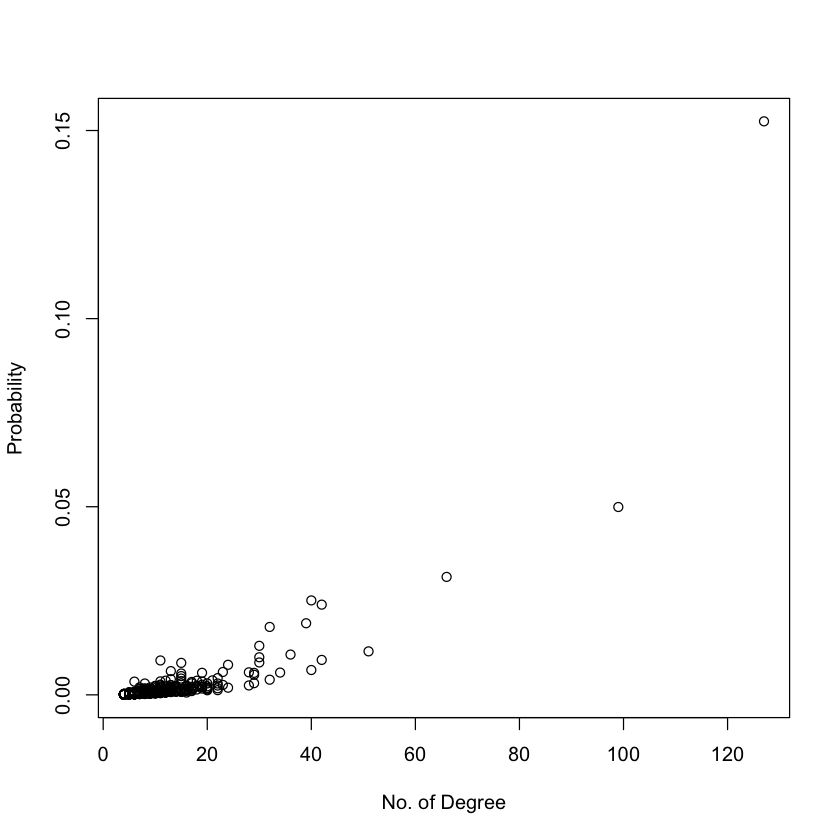

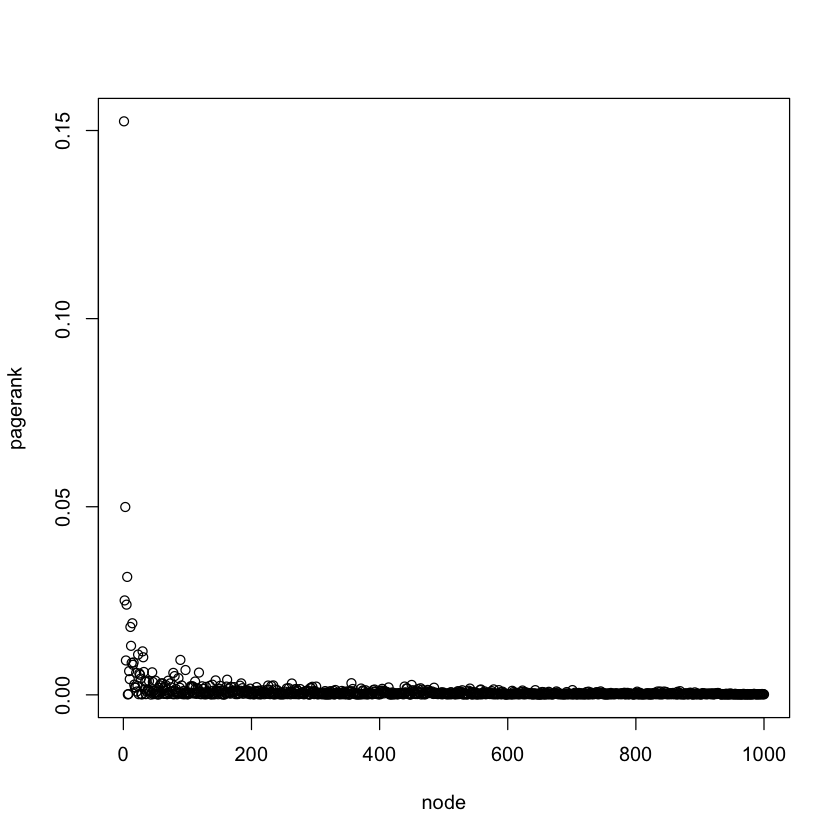

In [9]:
pg_no_tel = randomwalker(g, 1)

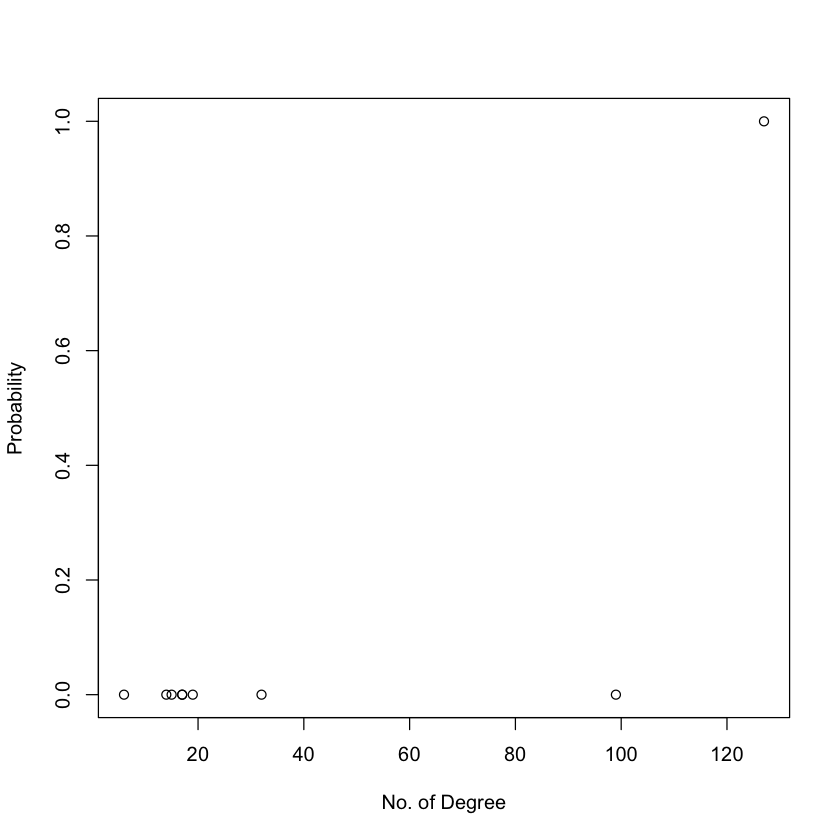

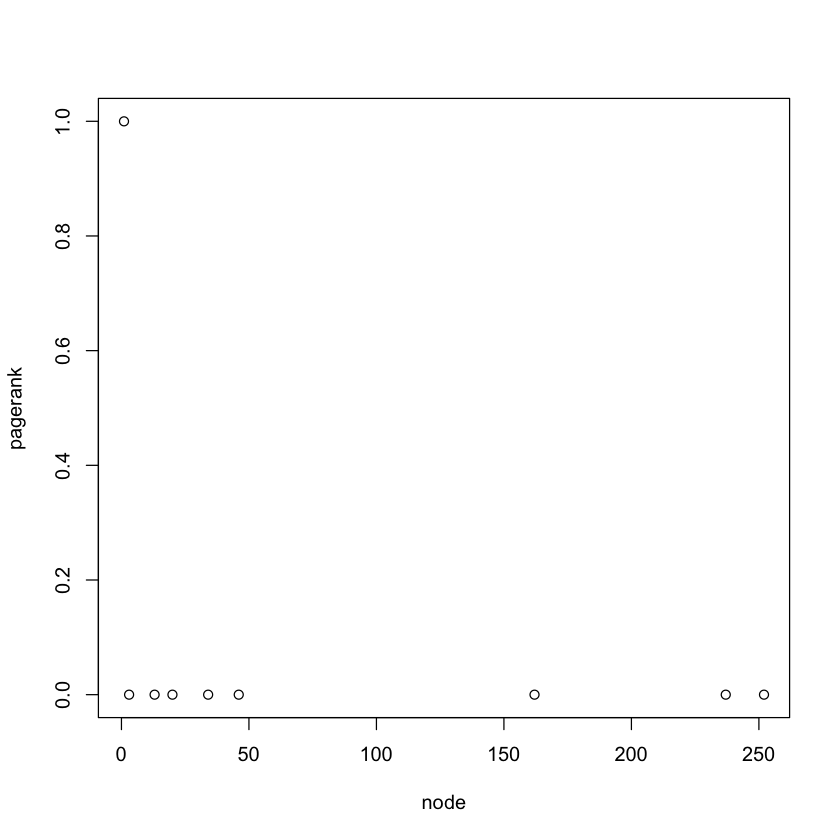

In [10]:
#TA's way
pg_no_tel_t = randomwalker_t(g, 1)

[1] 1

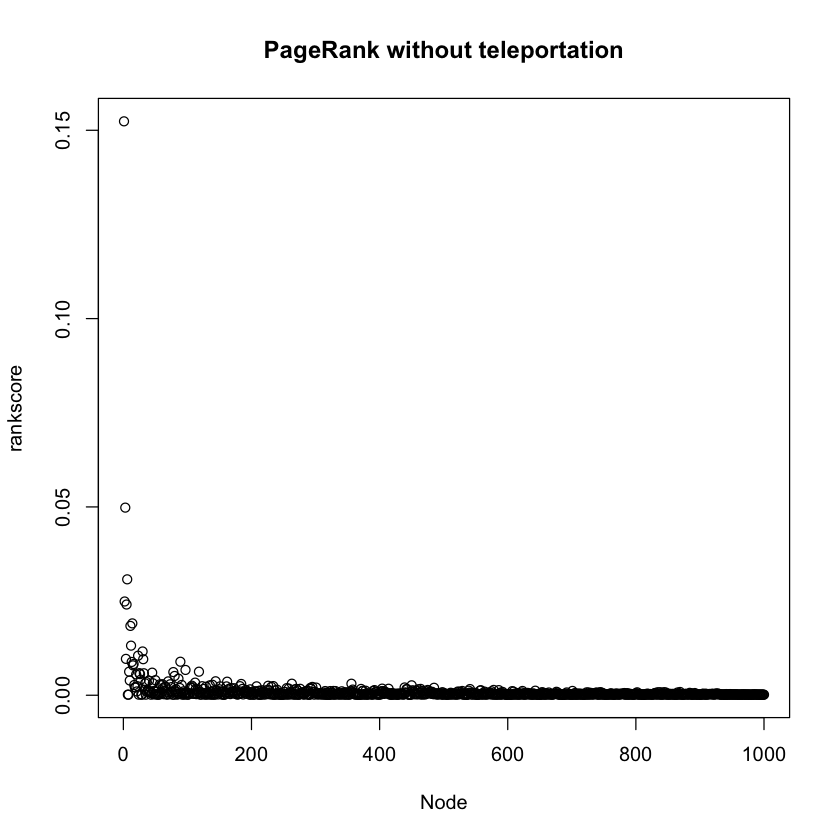

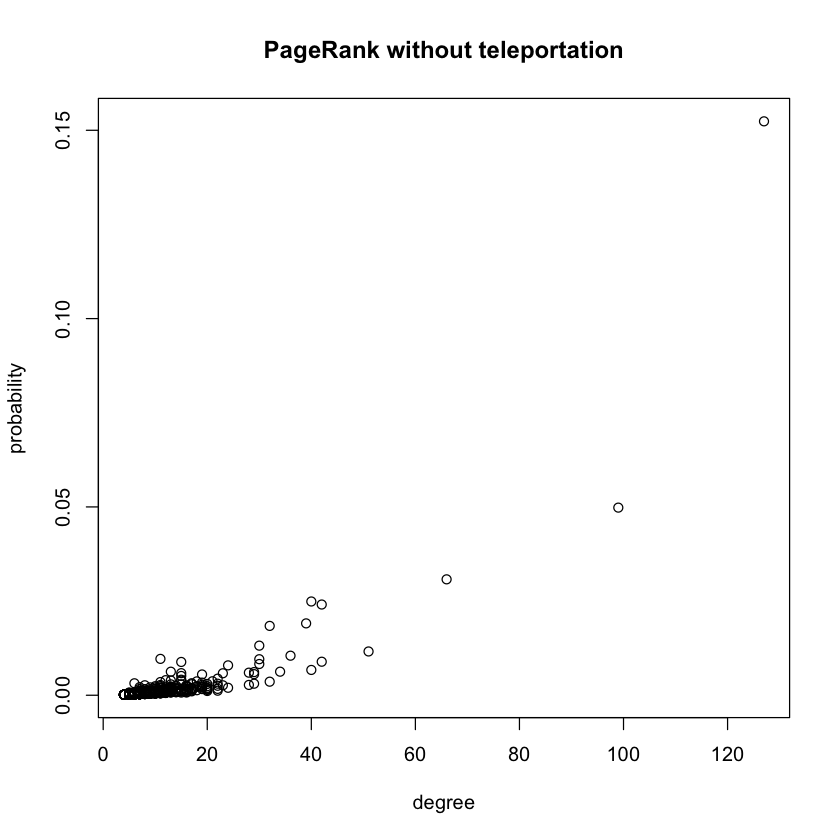

In [46]:
#test
pr_no_damp = page_rank(g, directed = TRUE, damping = 1)$vector
sum(pr_no_damp)
plot(pr_no_damp,main="PageRank without teleportation",xlab="Node",ylab="rankscore")
plot(dg,pr_no_damp, main="PageRank without teleportation",xlab="degree",ylab="probability")

In [18]:
cor(dg, pg_no_tel)
cor(dg, pg_no_tel_t)
cor(dg, pr_no_damp)

[1] 0.7942274

[1] 0.5120699

ERROR: Error in is.data.frame(y): objeto 'pr_no_damp' no encontrado


(b)

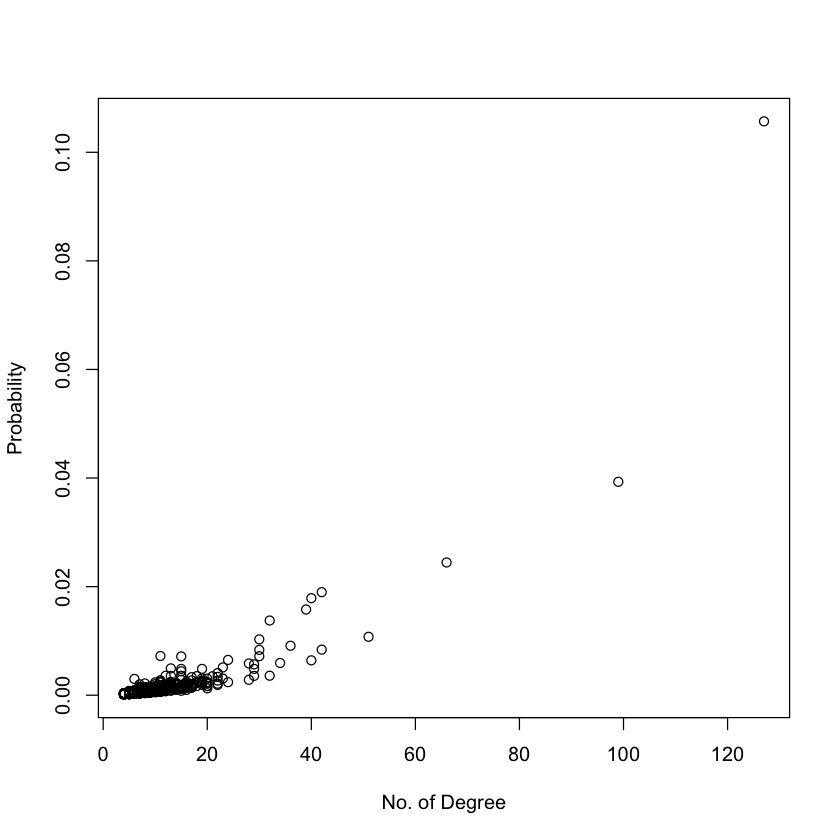

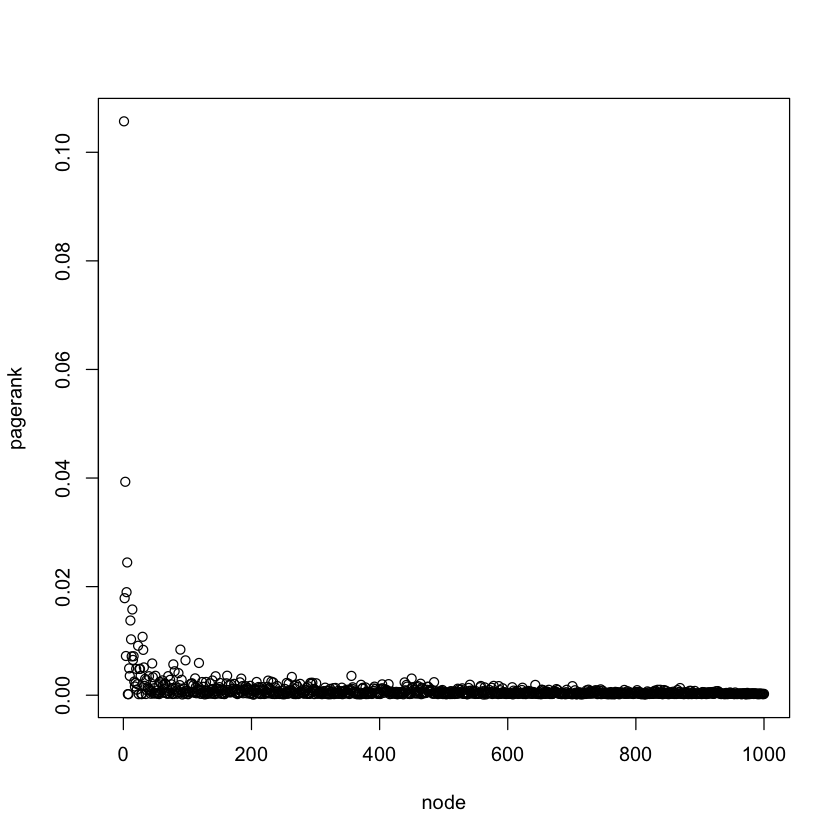

In [11]:
#standard way
pg_tel = randomwalker(g, 0.85)

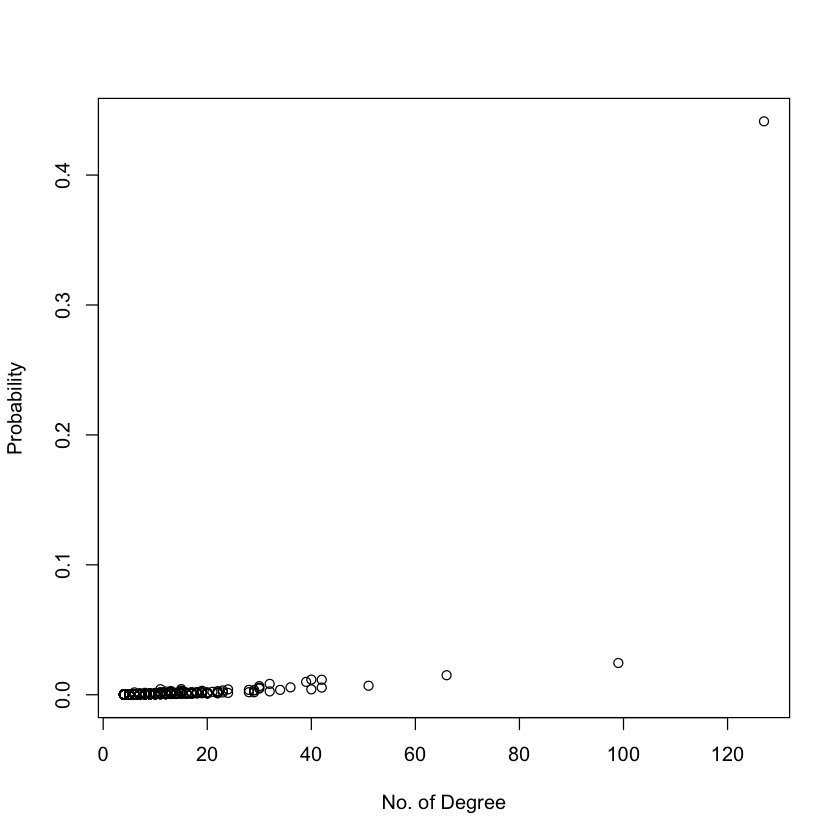

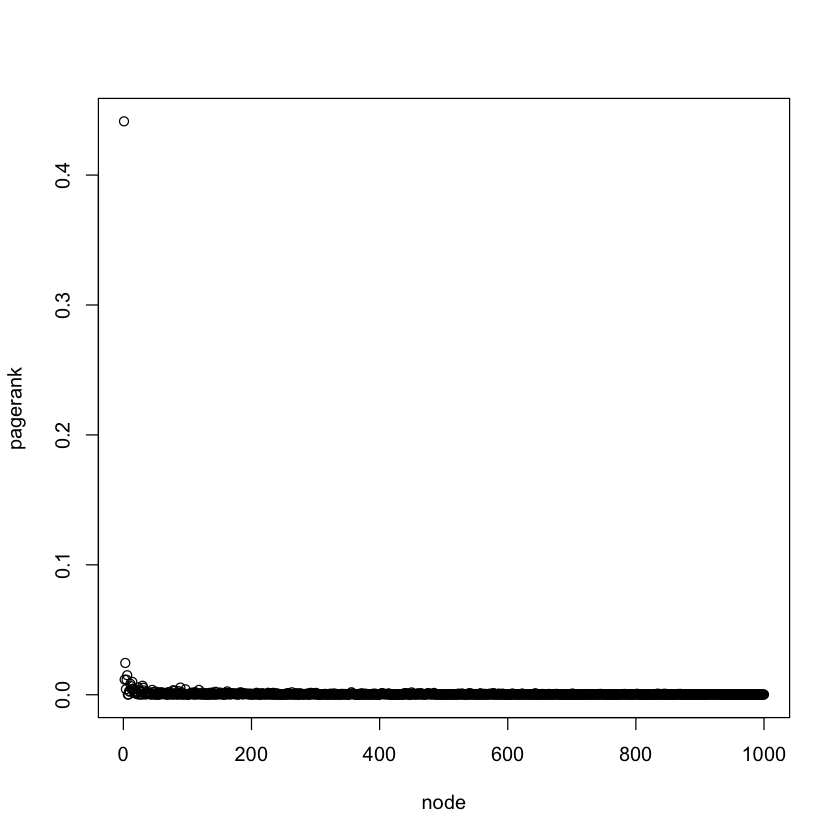

In [12]:
#TA's Way
pg_tel_t = randomwalker_t(g, 0.85)

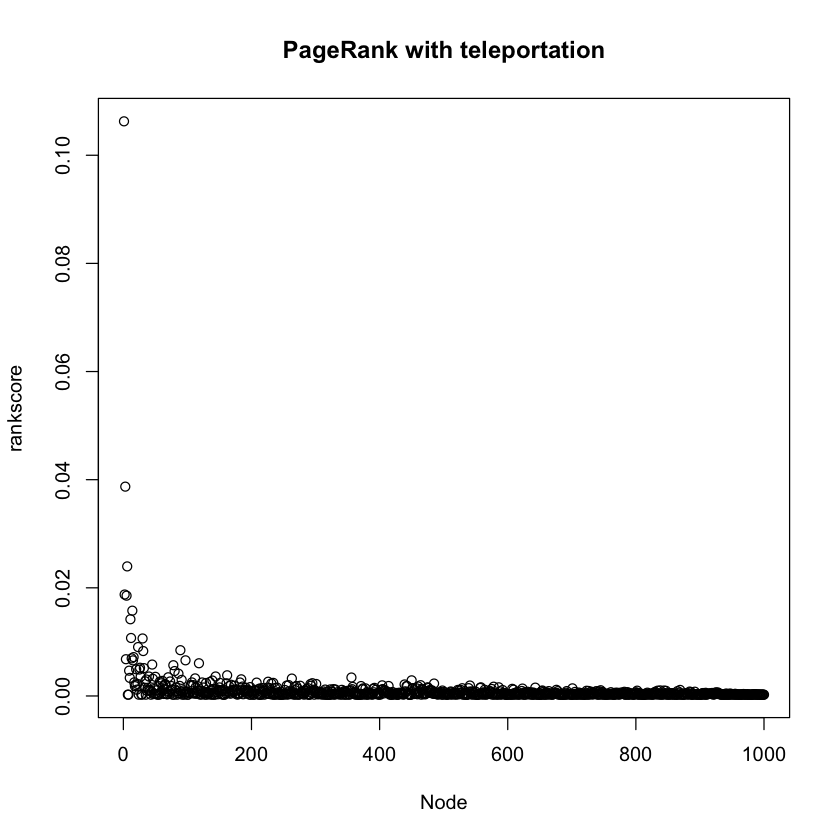

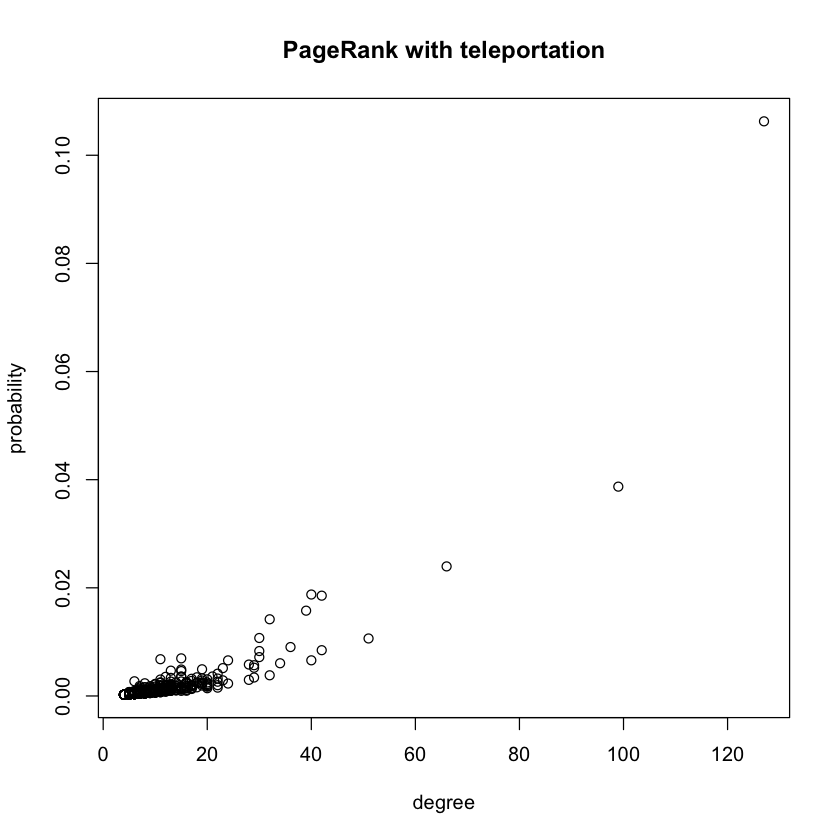

In [30]:
#test
pr_damp = page_rank(g, directed = TRUE, damping = 0.85)$vector
plot(pr_damp,main="PageRank with teleportation",xlab="Node",ylab="rankscore")
plot(dg,pr_damp, main="PageRank with teleportation",xlab="degree",ylab="probability")

In [14]:
cor(dg,pr_damp)

[1] 0.8766557

In [19]:
cor(dg, pg_tel)
cor(dg, pg_tel_t)

[1] 0.833057

[1] 0.5791514

# 2.4 Personalized PageRank  
(a)

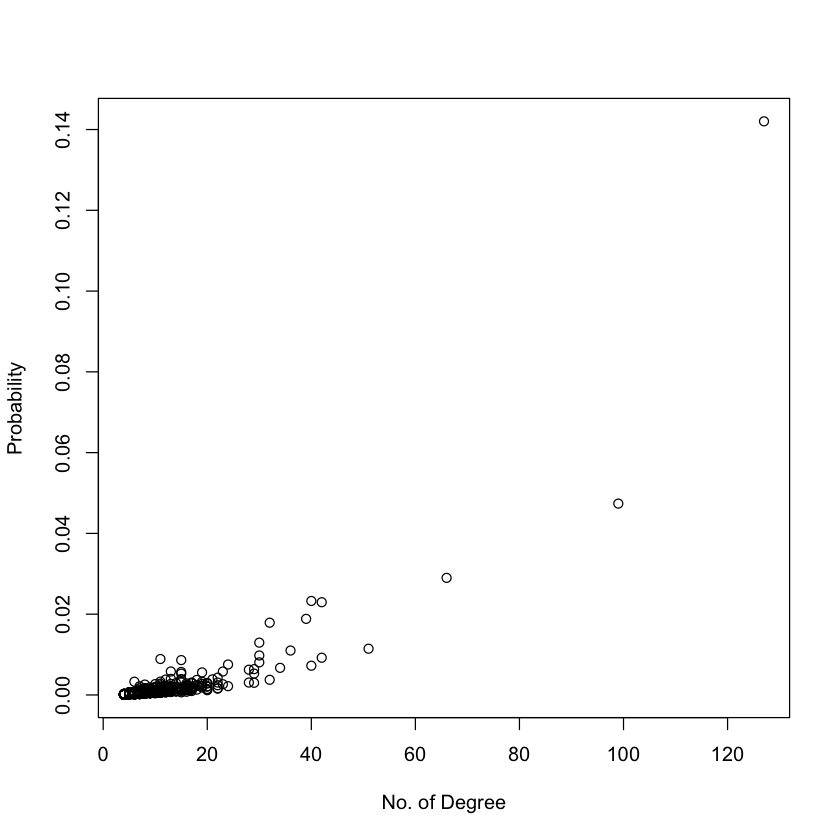

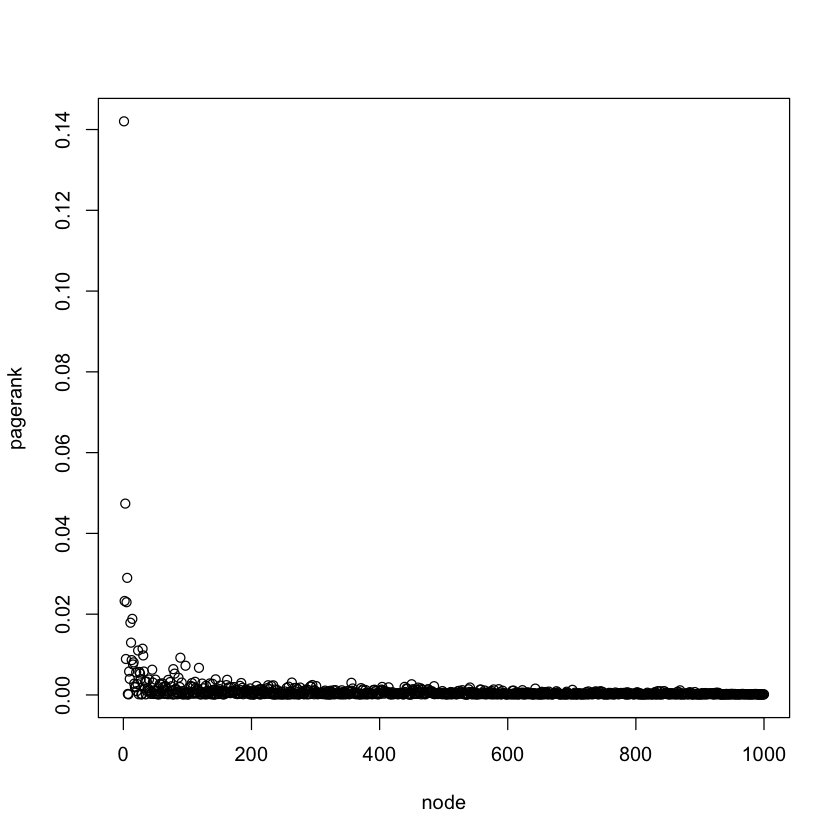

In [13]:
ppg = randomwalker(g, 0.85, prob_dist=pg_tel)

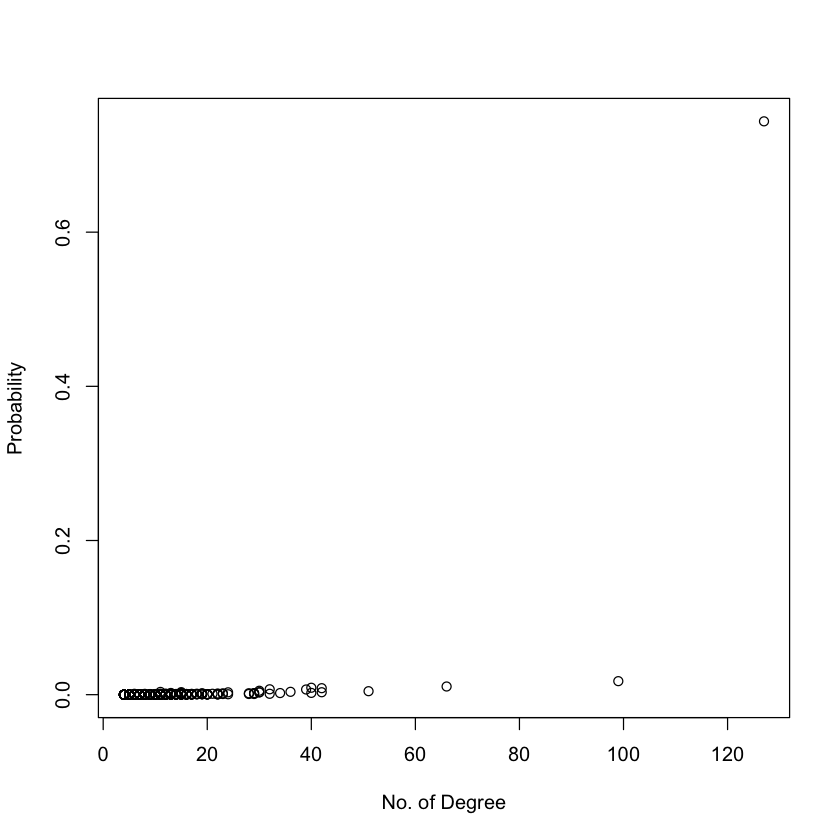

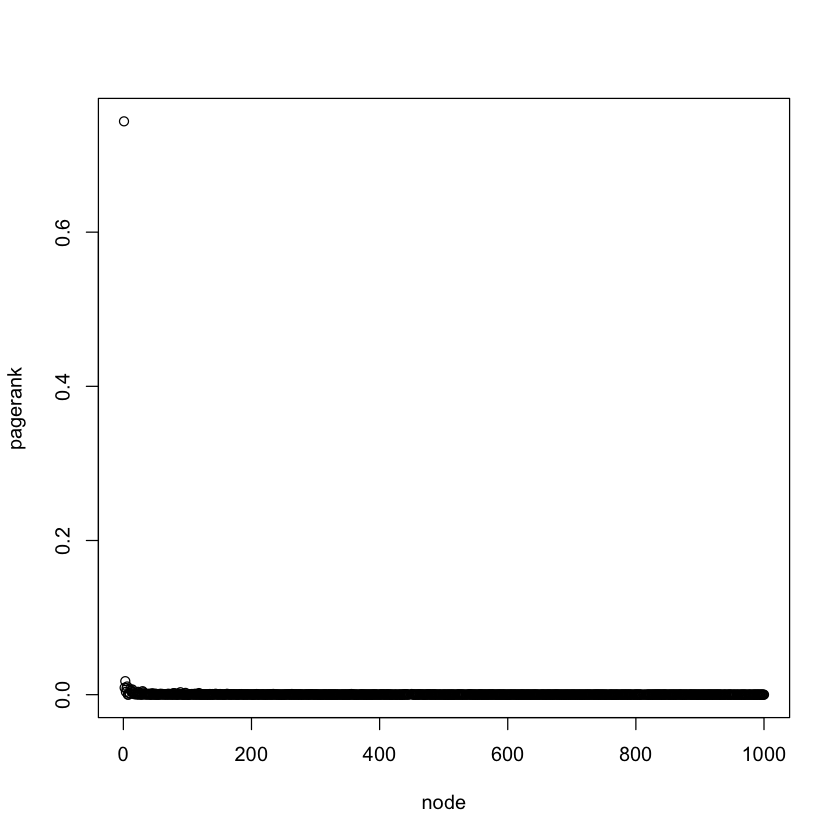

In [14]:
ppg_t = randomwalker_t(g, 0.85, prob_dist=pg_tel_t)

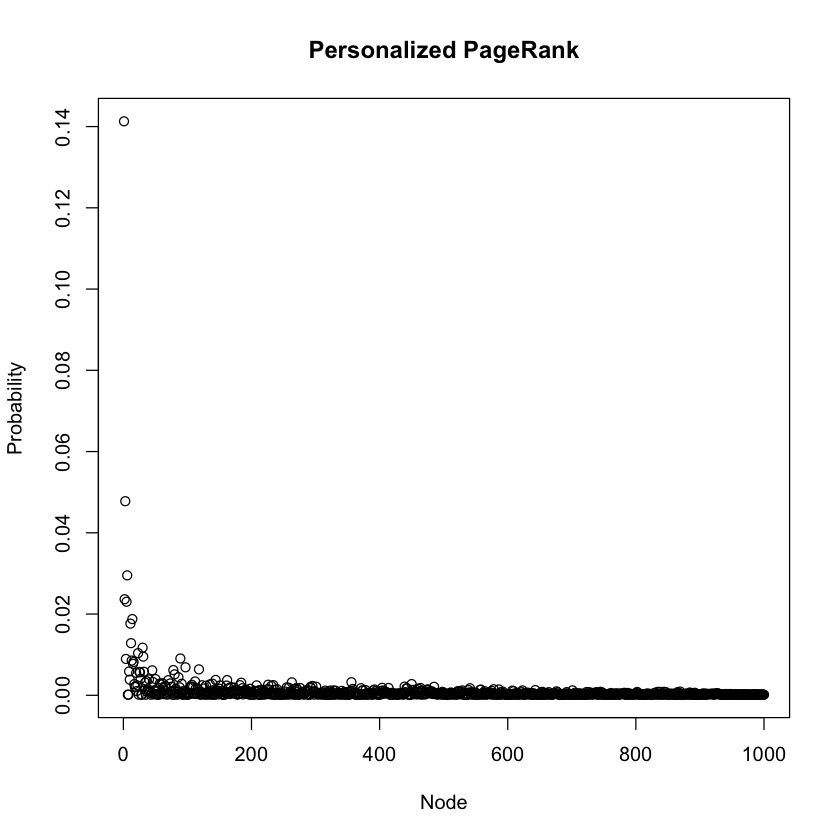

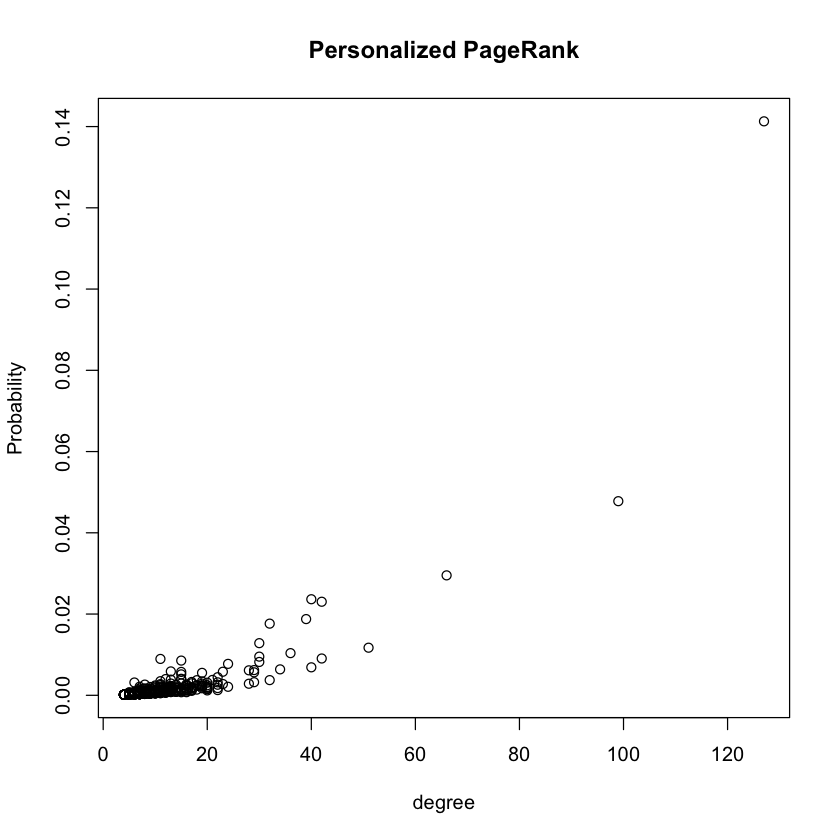

In [32]:
#test
PR = page_rank(g, directed = TRUE, damping = 0.85, personalized = pr_damp)$vector
plot(PR,main="Personalized PageRank",xlab="Node",ylab="Probability")
plot(dg, PR, main="Personalized PageRank",xlab="degree",ylab="Probability")

In [33]:
cor(dg,PR)

[1] 0.8046297

In [20]:
cor(dg, ppg_t)

[1] 0.5394008

(b)

In [15]:
#create function to find the index of median in a vector
whichmedian <- function(x) which.min(abs(x - median(x)))

In [16]:
#create a new prob distribution by giving two medion probability of 0.5
prob_median <- rep(0, length(pg_tel_t))
median_1 <- whichmedian(pg_tel_t)
median_2 <- whichmedian(pg_tel_t[c(1:(median_1-1), (median_1+1):length(pg_tel_t))])
prob_median[median_1] = 0.5
prob_median[median_2] = 0.5

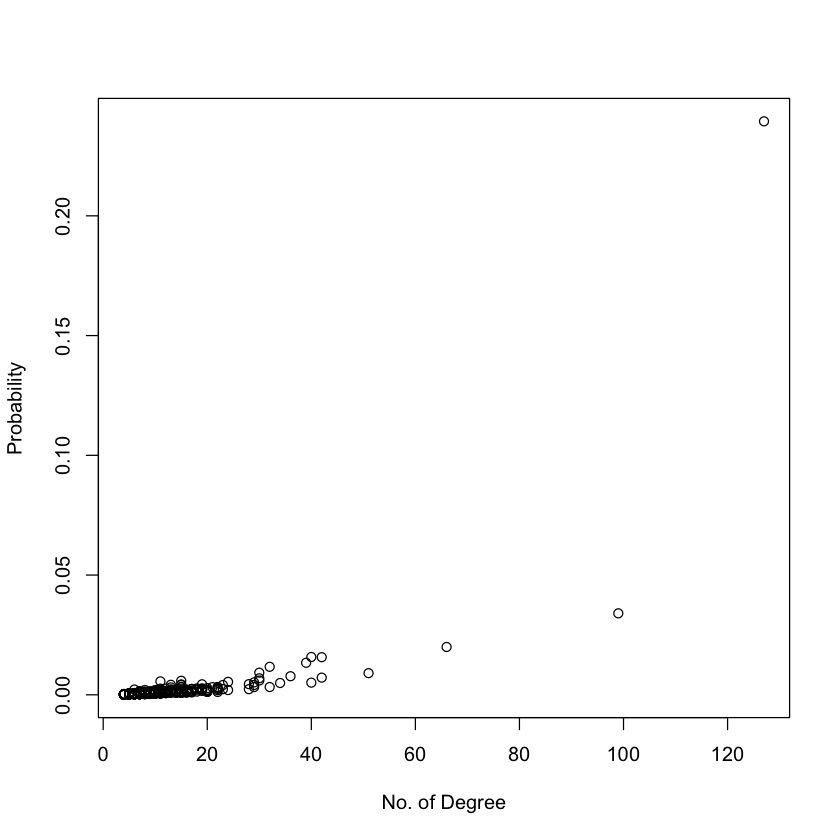

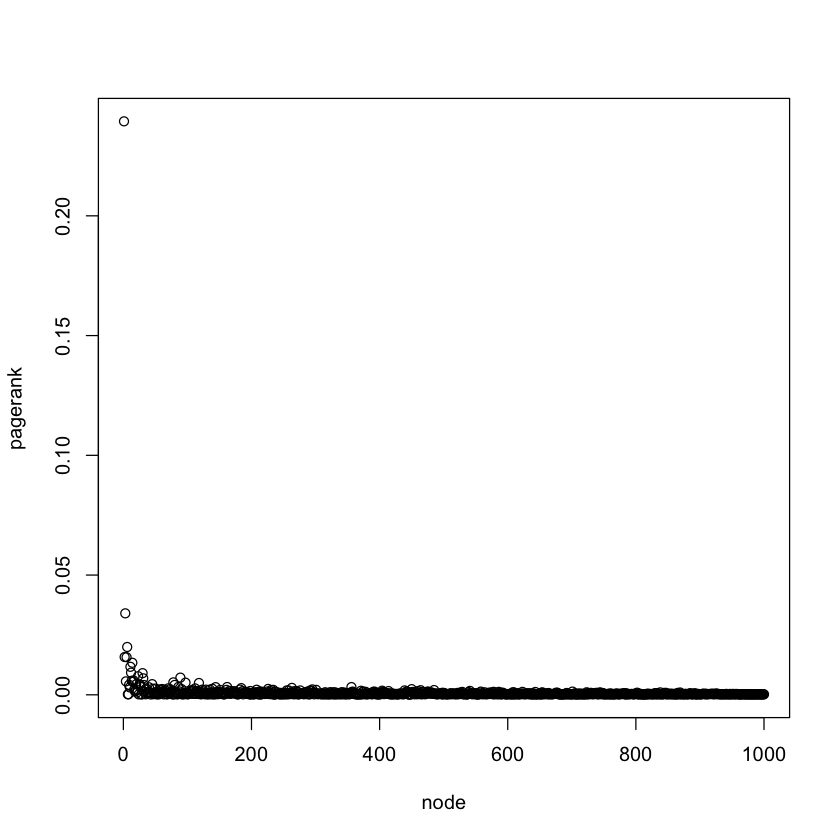

In [13]:
#generate new pagerank
mpg = randomwalker(g, 0.85, prob_dist=prob_median)

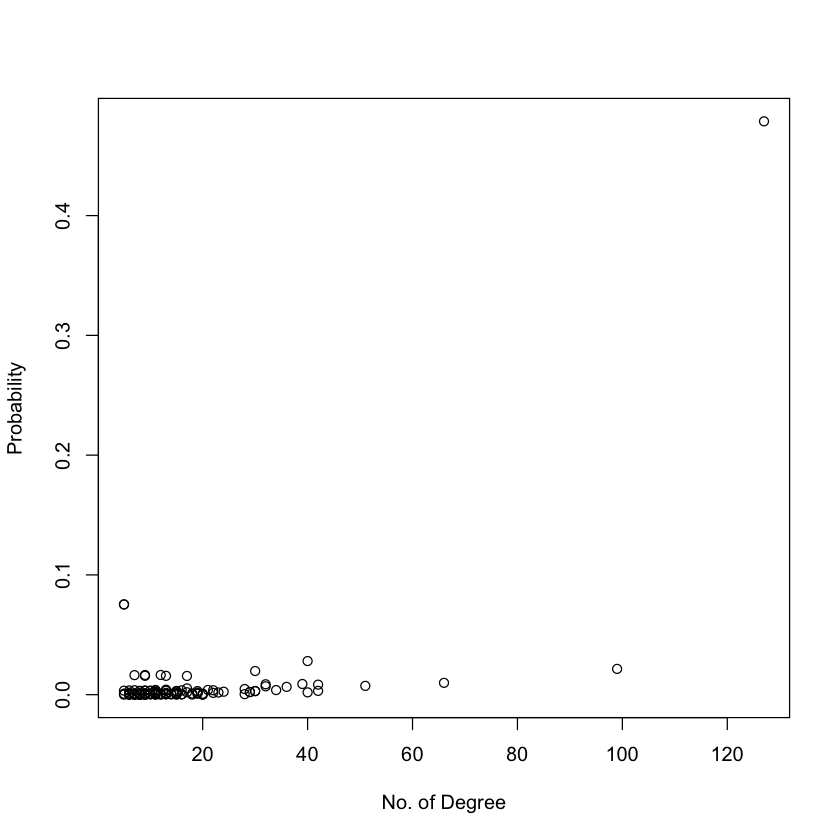

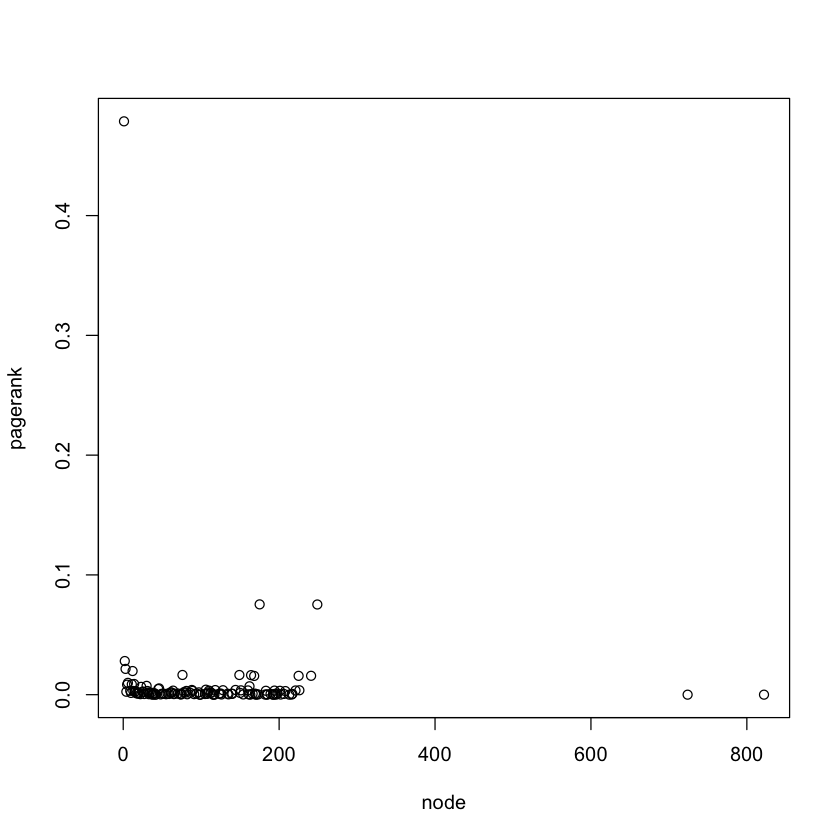

In [17]:
mpg_t = randomwalker_t(g, 0.85, prob_dist=prob_median)

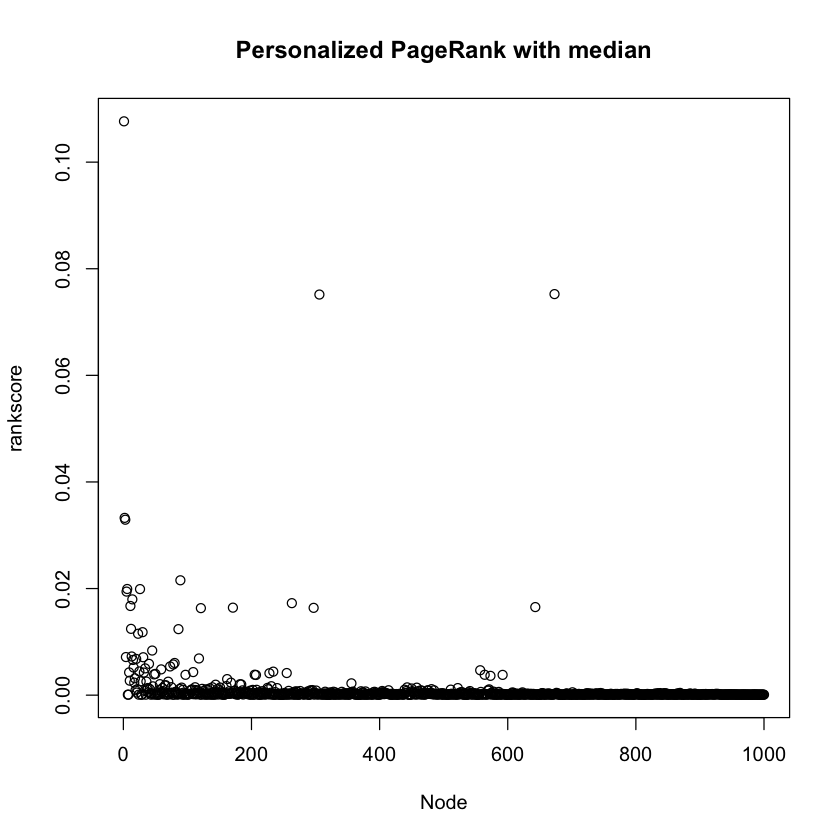

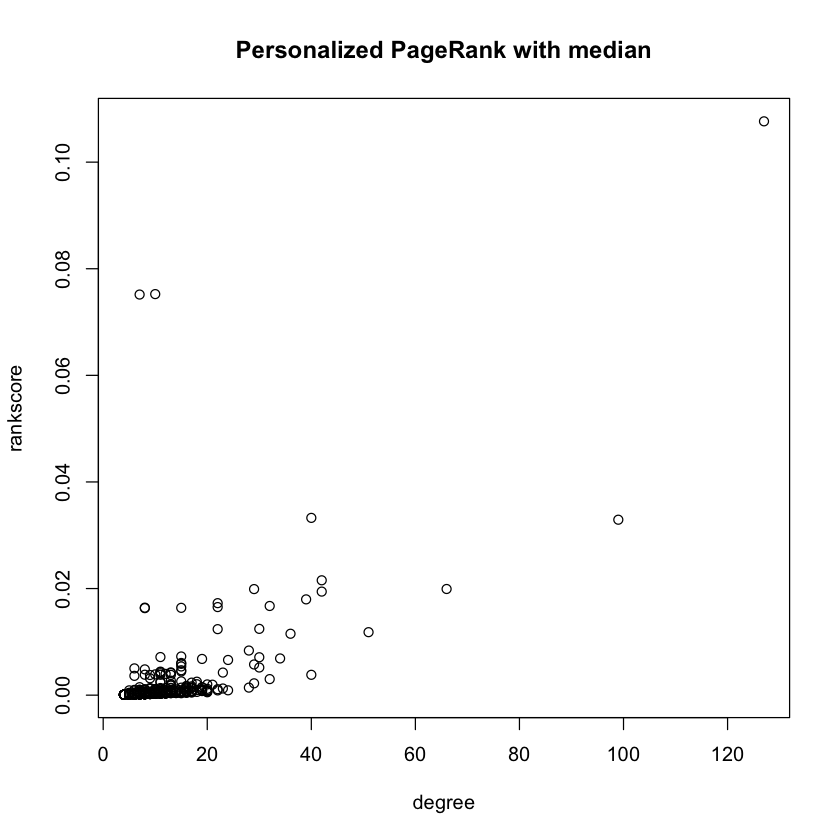

In [37]:
#test
PR_median = page_rank(g, directed = TRUE, damping = 0.85, personalized = prob_median)$vector
plot(PR_median,main="Personalized PageRank with median",xlab="Node",ylab="rankscore")
plot(dg, PR_median, main="Personalized PageRank with median",xlab="degree",ylab="rankscore")

In [26]:
cor(dg,PR_median)

[1] 0.6373319

In [21]:
cor(dg,mpg_t)

[1] 0.5516558